In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
df= pd.read_csv('heart_disease_data.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.shape

(303, 14)

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        2

In [14]:
df["age"].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

<Axes: ylabel='Frequency'>

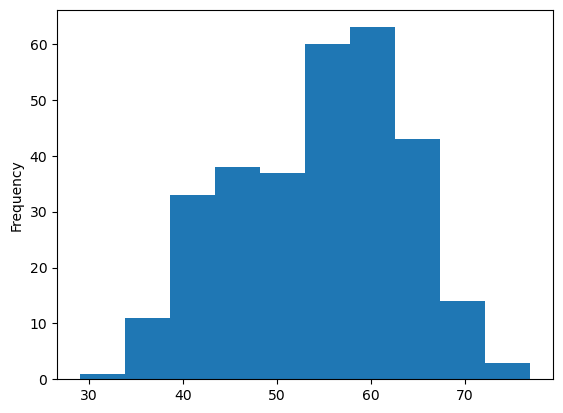

In [15]:
df["age"].plot(kind="hist")

<Axes: >

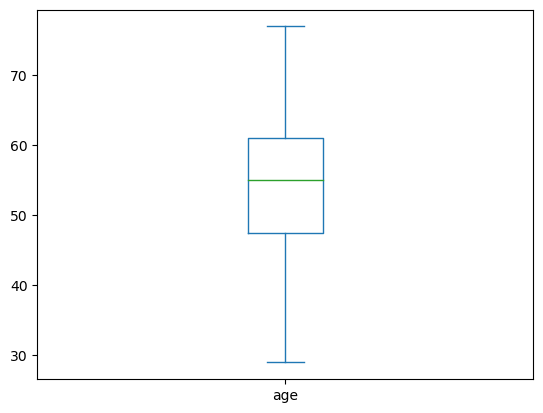

In [16]:
df["age"].plot(kind="box")

In [17]:
df["age"].skew()

-0.2024633654856539

In [18]:
df["age"].isnull().sum()

0

<Axes: ylabel='Density'>

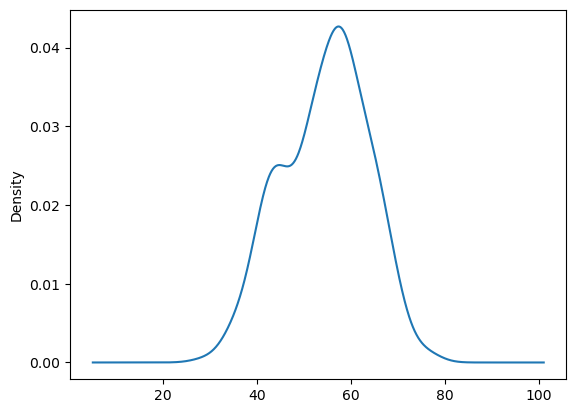

In [19]:
df["age"].plot(kind="kde")

In [20]:
df["age"].isnull().sum()

0

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

<Axes: ylabel='Frequency'>

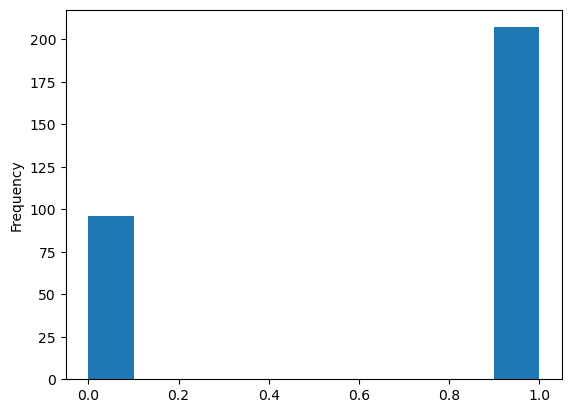

In [23]:
df["sex"].plot(kind="hist")

<Axes: >

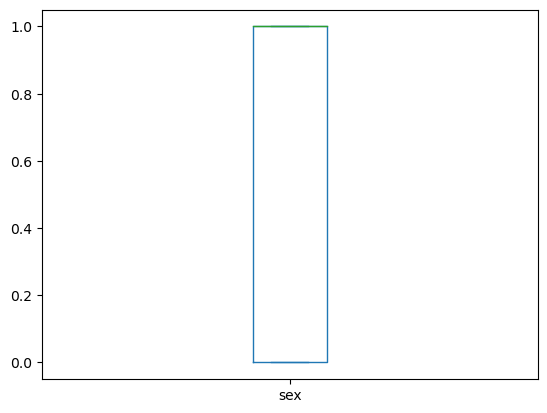

In [24]:
df["sex"].plot(kind="box")

<Axes: >

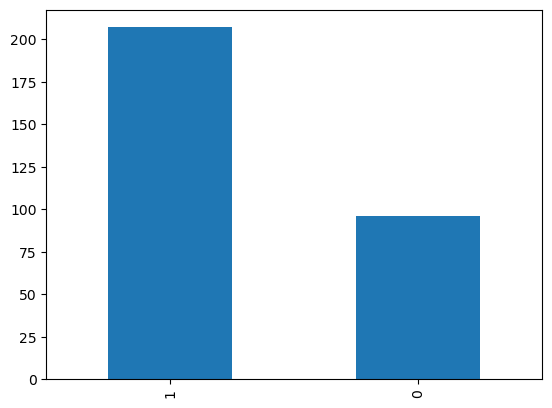

In [25]:
df["sex"].value_counts().plot(kind="bar")

In [26]:
df["sex"].isnull().sum()

0

In [28]:
df["sex"].skew()

-0.791335191480832

In [29]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: ylabel='Frequency'>

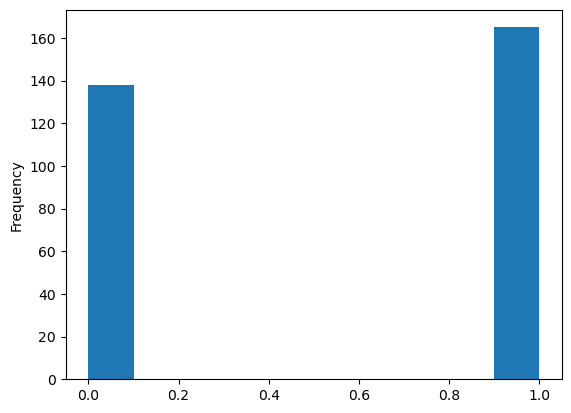

In [30]:
df["target"].plot(kind="hist")

<Axes: >

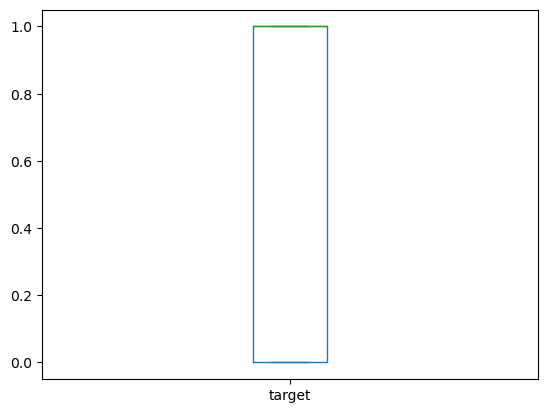

In [31]:
df["target"].plot(kind="box")

<Axes: >

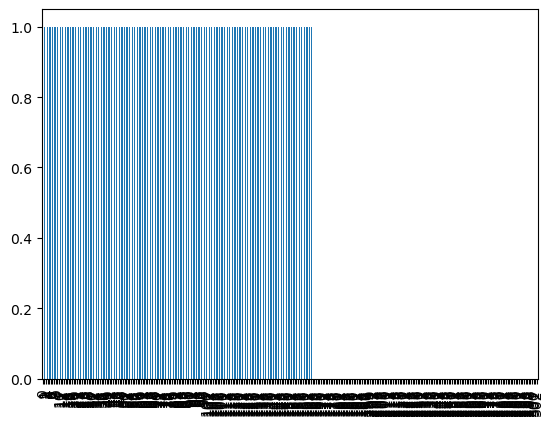

In [32]:
df["target"].plot(kind="bar")

In [33]:
df["target"].skew()

-0.17982105403495655

<Axes: ylabel='Density'>

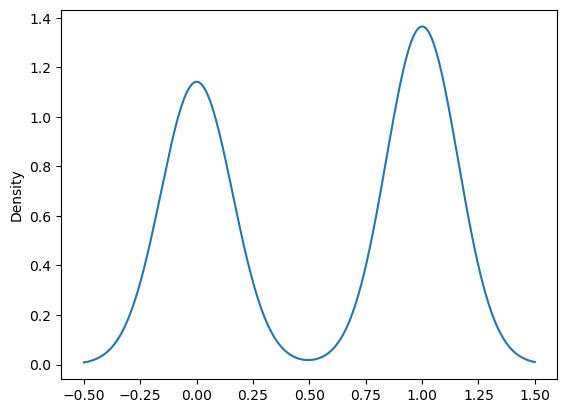

In [34]:
df["target"].plot(kind="kde")

In [ ]:
#now divide data into x and y

In [35]:
x= df.drop(columns=["target"],axis=1)

In [36]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [37]:
y=df["target"]

In [38]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
#split the data into x and y

In [39]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=1)

In [40]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3


In [41]:
x_train.shape

(212, 13)

In [42]:
x_test.shape

(91, 13)

In [43]:
y_train.shape

(212,)

In [45]:
y_test.shape

(91,)

In [ ]:
#standard

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [48]:
x_train

array([[-0.33491521,  0.6355891 ,  1.99223435, ...,  0.9242039 ,
         0.29558577, -0.53505171],
       [-1.09720687,  0.6355891 , -0.94758246, ...,  0.9242039 ,
         0.29558577, -0.53505171],
       [-0.00821878,  0.6355891 , -0.94758246, ..., -0.722277  ,
         0.29558577,  1.13305069],
       ...,
       [-2.73068901,  0.6355891 ,  0.03235647, ...,  0.9242039 ,
        -0.6990838 , -0.53505171],
       [-0.33491521,  0.6355891 , -0.94758246, ...,  0.9242039 ,
        -0.6990838 ,  1.13305069],
       [-0.00821878,  0.6355891 ,  1.01229541, ...,  0.9242039 ,
        -0.6990838 ,  1.13305069]])

In [49]:
x_test

array([[ 0.8629717 , -1.57334352, -0.94758246, ..., -2.36875789,
         2.28492491,  1.13305069],
       [ 0.20957884,  0.6355891 ,  0.03235647, ...,  0.9242039 ,
        -0.6990838 ,  1.13305069],
       [-0.66161163,  0.6355891 , -0.94758246, ...,  0.9242039 ,
         1.29025534,  1.13305069],
       ...,
       [-0.98830806, -1.57334352,  0.03235647, ..., -0.722277  ,
        -0.6990838 , -0.53505171],
       [ 0.42737646,  0.6355891 , -0.94758246, ..., -2.36875789,
         2.28492491, -2.20315412],
       [ 1.29856693,  0.6355891 ,  0.03235647, ..., -0.722277  ,
         2.28492491, -2.20315412]])

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr= LogisticRegression()

In [53]:
lr.fit(x_train,y_train)

LogisticRegression()

In [54]:
x_train_prediction = lr.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print(training_data_accuracy)

0.8679245283018868


In [56]:
# accuracy on test data
x_test_prediction = lr.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
test_data_accuracy

0.7802197802197802

In [58]:
from sklearn.model_selection import GridSearchCV

In [60]:
parameter={"penalty":["l1","l2"], "C":[1,2,3,4], "max_iter":[100,200,300]}

In [64]:
lr_regressor=GridSearchCV(lr, param_grid=parameter,scoring="accuracy",cv=5)

In [65]:
lr_regressor.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [67]:
print(lr_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [68]:
print(lr_regressor.best_score_)

0.8258028792912514


In [ ]:
#prediction


In [69]:
y_pred=lr_regressor.predict(x_test)

In [70]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [ ]:
#acccluracy score

In [71]:
from sklearn.metrics import accuracy_score, classification_report

In [72]:
score=accuracy_score(y_pred,y_test)
print(score)

0.7802197802197802


In [75]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        39
           1       0.82      0.79      0.80        52

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

